- 성적 : 점수(연속된 숫자)로 평가 -> 회귀분석

### 딥러닝에서 사용할 프레임워크
- Tensorflow(Tensorflow + Keras)
- 복잡한 신경망을 블록 형태로 쉽게 구현하도록 만든 딥러닝 프레임워크

In [2]:
# mount() : 장치를 특정한 위치에 연결해주는 함수
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 현재 파일이 있는 곳으로 기본경로 잡아주기
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [4]:
# 현재 우리 위치 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [5]:
# 텐서플로우 설치 코드
# !pip install tensorflow

In [6]:
# 텐서플로우 버전 확인
import tensorflow as tf
print(tf.__version__)
# 만약 moduleNotFoundError :  모듈이 설치가 되어있지 않다!

2.15.0


### 목표 설정
- 학생 성적 데이터를 이용해서 수학 성적을 예측하는 회귀 모델을 만들어보자!
- tensorflow.keras를 이용해서 신경망을 구현하는 방법을 알아보자.

In [7]:
# 기초 3종 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 데이터 불러오기
data = pd.read_csv('data/student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [9]:
# 중간에 생략된 컬럼 전체 확인해보기
pd.set_option('display.max_columns', None)

In [10]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [11]:
# 결측치 확인 - 결측치 없음! / object, int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
# 문제와 정답으로 분리

# 정답 데이터 -> 수학 점수 - G3
y = data['G3']

# 문제 데이터 -> school ~ absences
X = data.loc[:, 'school':'absences']
# X = data.iloc[:, 0:30]

In [13]:
X.shape, y.shape

((395, 30), (395,))

In [14]:
# 훈련 / 평가셋 분리
# train_test_split - 평가셋 30%, 랜덤시드 = 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 30), (119, 30), (276,), (119,))

### 신경망 모델 만들기
1. 신경망 구조 설계
2. 신경망 학습과 평가방법 설정
3. 학습 및 학습 과정 시각화
4. 모델 평가 및 예측

In [16]:
# 신경망 구조 재료 가져오기(import)
# Sequential : 신경망 모델의 뼈대를 구현하는 함수
# 각자의 층을 선형으로 연결해주는 역할을 담당
from tensorflow.keras.models import Sequential

# Dense : 신경망의 층(뉴런의 묶음)을 설정하고 구성해주는 함수
# Activation : 활성화를 시켜주는 함수
from tensorflow.keras.layers import Dense, Activation

In [17]:
# 딥러닝은 뼈대에 층을 하나하나 차곡차곡 쌓아주는 형태로 구현
# 입력층 -> 중간층 -> 출력층의 순서로 구현

model = Sequential()

# 입력층 설정
model.add(Dense(units=4,   # add : 층을 추가하는 함수 / units : 뉴런의 개수 설정
                input_dim=1))  # input_dim : 입력할 데이터가 가진 특성의 개수(사용할 특성의 개수)
model.add(Activation('sigmoid'))

# 출력층 설정
model.add(Dense(units=1))

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# 2. 신경망 학습 / 평가 방법 설정
# compile() : 앞서 만든 모델이 효과적으로 구현될 수 있도록 환경 설정을 하면서 읽어오는 함수
# 모델을 학습시키기 전 손실함수, 최적화 방법, 평가지표를 설정하는 부분
model.compile(loss='mse',  # 손실함수 : 현재는 회귀 분석 진행 중. 평균 제곱 오차를 이용해서 오차 체크
              optimizer='SGD',  # SGD : 최적화 함수, 모델의 성능을 최적화시키는 방법 설정 -> 확률적 경사하강법
              # metrics = 'mse' # 모델의 성능 평가 지표 설정 부분 / 평가지표
              )

In [19]:
# 3. 모델 학습
# epochs = 학습을 얼마나 시킬 것인가
# h = model.fit(X_train, y_train, epochs = 100)
# X_train에 있는 특성의 개수(30개)와 input_dim(특성의 개수;1개)가 다름 -> 오류 발생!
h = model.fit(X_train['studytime'], y_train, epochs = 100)

Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 86.5749
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 39.3619
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 25.0759
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 21.7556
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 20.9337
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 20.8428
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 20.8041
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 20.7673
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 20.7587
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 20.8269
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 20.8112
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 20.7833
Epoch 13/100
9/9 [==============================]

In [20]:
# h라는 변수 안에는 loss와 optimizer가 리스트 형태로 쌓인다!
h.history['loss']  # 학습을 진행할 때 어떤 오차를 가지고 있는가

[86.57491302490234,
 39.361881256103516,
 25.07585334777832,
 21.755647659301758,
 20.933664321899414,
 20.84281349182129,
 20.804136276245117,
 20.767314910888672,
 20.758726119995117,
 20.826923370361328,
 20.811168670654297,
 20.78330421447754,
 20.83330535888672,
 20.77539825439453,
 20.775035858154297,
 20.79357147216797,
 20.814624786376953,
 20.843900680541992,
 20.80640411376953,
 20.81633758544922,
 20.800073623657227,
 20.808507919311523,
 20.846450805664062,
 20.812328338623047,
 20.76542854309082,
 20.772220611572266,
 20.773799896240234,
 20.775985717773438,
 20.777359008789062,
 20.79708480834961,
 20.803598403930664,
 20.82159423828125,
 20.811567306518555,
 20.802288055419922,
 20.83062171936035,
 20.805179595947266,
 20.78483772277832,
 20.80303955078125,
 20.80709457397461,
 20.785924911499023,
 20.78600311279297,
 20.76671028137207,
 20.800254821777344,
 20.770862579345703,
 20.792753219604492,
 20.7726993560791,
 20.78764533996582,
 20.805734634399414,
 20.758392333

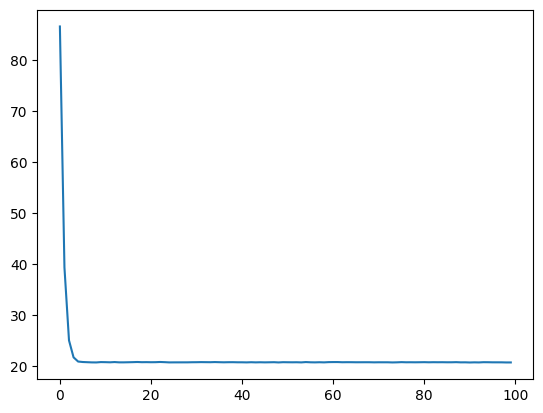

In [21]:
# 오차 변경 값 시각화 -> 성능이 좋아지는지 나빠지는지 확인
plt.plot(h.history['loss'])
plt.show()

In [22]:
# 4. 학습된 모델을 이용해서 예측을 진행해보자
model.predict(X_test['studytime'])

4/4 [==============================] - 0s 3ms/step


array([[10.283983],
       [10.283983],
       [ 9.615112],
       [10.283983],
       [10.283983],
       [10.283983],
       [10.283983],
       [ 9.615112],
       [10.641546],
       [ 9.615112],
       [ 9.615112],
       [10.283983],
       [10.641546],
       [10.55411 ],
       [10.641546],
       [ 9.615112],
       [10.55411 ],
       [ 9.615112],
       [ 9.615112],
       [10.283983],
       [10.55411 ],
       [10.283983],
       [10.283983],
       [10.55411 ],
       [10.283983],
       [10.283983],
       [10.283983],
       [10.641546],
       [10.283983],
       [10.283983],
       [10.55411 ],
       [10.283983],
       [10.55411 ],
       [ 9.615112],
       [10.55411 ],
       [10.55411 ],
       [10.283983],
       [10.283983],
       [10.283983],
       [10.283983],
       [10.283983],
       [10.283983],
       [ 9.615112],
       [ 9.615112],
       [10.55411 ],
       [10.283983],
       [ 9.615112],
       [ 9.615112],
       [10.55411 ],
       [10.55411 ],


In [23]:
# 모델 성능 측정
model.evaluate(X_test['studytime'], y_test)
# 21.0366 -> 루트 씌우면 4.XX

4/4 [==============================] - 0s 4ms/step - loss: 21.1494


21.1494140625

#### 2개의 특성을 넣어서 작동하는 모델을 만들어보자!

In [24]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [25]:
# X1이라는 변수에 2가지 특성을 담아주자. (traveltime, studytime)
X1 = data[['traveltime', 'studytime']]  # 멀티인덱싱할 때 대괄호 두 개!
y1 = data['G3']

In [26]:
X1.shape

(395, 2)

In [28]:
# 훈련 데이터셋과 평가 데이터셋 분할
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,
                                                        test_size=0.3,
                                                        random_state=20)

In [29]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((276, 2), (119, 2), (276,), (119,))

In [41]:
# 신경망 구조 설계
model1 = Sequential()  # 인공신경망의 뼈대를 생성

# 입력층 설정
model1.add(Dense(units=4, input_dim=2))
model1.add(Activation('sigmoid'))

# 중간층(은닉층) 설정
model1.add(Dense(units=2))
model1.add(Activation('sigmoid'))

# 출력층 설정
# 출력값 1개 설정하기 위해 뉴런을 1개만 주기
# 활성화 함수는 생략
model1.add(Dense(units=1))

# 신경망 요약
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 activation_10 (Activation)  (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
 activation_11 (Activation)  (None, 2)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 모델 컴파일
model1.compile(loss='mse',
               optimizer='SGD')

In [43]:
# 모델 학습
h1 = model1.fit(X1_train, y1_train, epochs = 100)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 104.8222
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 65.5452
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 42.0952
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 30.5501
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 25.2866
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 22.9385
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 21.8633
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 21.2882
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 21.0553
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 20.9620
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 20.9061
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 20.9102
Epoch 13/100
9/9 [==============================

In [44]:
model1.evaluate(X1_test, y1_test)

4/4 [==============================] - 0s 3ms/step - loss: 21.2351


21.235057830810547

In [36]:
# 3. 입력 특성을 전부 넣어보자
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 311 to 355
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      276 non-null    object
 1   sex         276 non-null    object
 2   age         276 non-null    int64 
 3   address     276 non-null    object
 4   famsize     276 non-null    object
 5   Pstatus     276 non-null    object
 6   Medu        276 non-null    int64 
 7   Fedu        276 non-null    int64 
 8   Mjob        276 non-null    object
 9   Fjob        276 non-null    object
 10  reason      276 non-null    object
 11  guardian    276 non-null    object
 12  traveltime  276 non-null    int64 
 13  studytime   276 non-null    int64 
 14  failures    276 non-null    int64 
 15  schoolsup   276 non-null    object
 16  famsup      276 non-null    object
 17  paid        276 non-null    object
 18  activities  276 non-null    object
 19  nursery     276 non-null    object
 20  higher      2

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 10 to 231
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      119 non-null    object
 1   sex         119 non-null    object
 2   age         119 non-null    int64 
 3   address     119 non-null    object
 4   famsize     119 non-null    object
 5   Pstatus     119 non-null    object
 6   Medu        119 non-null    int64 
 7   Fedu        119 non-null    int64 
 8   Mjob        119 non-null    object
 9   Fjob        119 non-null    object
 10  reason      119 non-null    object
 11  guardian    119 non-null    object
 12  traveltime  119 non-null    int64 
 13  studytime   119 non-null    int64 
 14  failures    119 non-null    int64 
 15  schoolsup   119 non-null    object
 16  famsup      119 non-null    object
 17  paid        119 non-null    object
 18  activities  119 non-null    object
 19  nursery     119 non-null    object
 20  higher      11

In [53]:
# object 데이터 타입 섞여있음 -> 원핫 인코딩 진행!
X_train_oh = pd.get_dummies(X_train).astype(int)
X_test_oh = pd.get_dummies(X_test).astype(int)

In [54]:
X_train_oh.shape, X_test_oh.shape

((276, 56), (119, 56))

In [55]:
X_train_oh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 311 to 355
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                276 non-null    int64
 1   Medu               276 non-null    int64
 2   Fedu               276 non-null    int64
 3   traveltime         276 non-null    int64
 4   studytime          276 non-null    int64
 5   failures           276 non-null    int64
 6   famrel             276 non-null    int64
 7   freetime           276 non-null    int64
 8   goout              276 non-null    int64
 9   Dalc               276 non-null    int64
 10  Walc               276 non-null    int64
 11  health             276 non-null    int64
 12  absences           276 non-null    int64
 13  school_GP          276 non-null    int64
 14  school_MS          276 non-null    int64
 15  sex_F              276 non-null    int64
 16  sex_M              276 non-null    int64
 17  address_R          

In [56]:
# 모든 입력 특성을 이용해서 신경망을 학습 / 평가해보자
# 문제 데이터 X_train, X_test
# 정답 데이터 y_train, y_test

# 신경망 구축
# 뼈대 설정
model2 = Sequential()

# 입력층
# 뉴런의 개수 4개 / input_dim = 입력 특성 개수
# 활성화 함수는 sigmoid
model2.add(Dense(units=4, input_dim=56))
model2.add(Activation('sigmoid'))

# 중간층
# 뉴런의 개수 1개
# 활성화 함수는 sigmoid
model2.add(Dense(units=1))
model2.add(Activation('sigmoid'))

# 출력층
# 뉴런의 개수 1개
# 활성화 함수는 생략
model2.add(Dense(units=1)) # 선형회귀식 이용 -> 실수 예측
# 활성화 함수를 사용하면 분류
# model2.add(Activation('linear')) -> default값

# 모델 요약
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 228       
                                                                 
 activation_14 (Activation)  (None, 4)                 0         
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
 activation_15 (Activation)  (None, 1)                 0         
                                                                 
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 235 (940.00 Byte)
Trainable params: 235 (940.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# 2. 학습 / 평가방법 설정
model2.compile(loss='mse',
               optimizer='SGD')

In [63]:
# 모델 학습
h2 = model2.fit(X_train_oh, y_train, epochs = 200)

Epoch 1/200
9/9 [==============================] - 0s 4ms/step - loss: 18.6103
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 17.1761
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 16.6704
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 19.3136
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 17.8314
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 15.6897
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 16.0404
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 15.7723
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 16.5368
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 17.5671
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 17.9582
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 16.6738
Epoch 13/200
9/9 [==============================]

In [64]:
h2.history['loss']

[18.610309600830078,
 17.176105499267578,
 16.670398712158203,
 19.313634872436523,
 17.831432342529297,
 15.689705848693848,
 16.040374755859375,
 15.772257804870605,
 16.536760330200195,
 17.56709861755371,
 17.958179473876953,
 16.67378807067871,
 16.19645118713379,
 18.324050903320312,
 15.862646102905273,
 15.914219856262207,
 15.397405624389648,
 15.658341407775879,
 15.330111503601074,
 15.088345527648926,
 17.74261474609375,
 15.656351089477539,
 15.917986869812012,
 15.747130393981934,
 16.690053939819336,
 15.745131492614746,
 17.986141204833984,
 16.32339096069336,
 15.305231094360352,
 15.70340633392334,
 15.634571075439453,
 16.038124084472656,
 15.395277976989746,
 16.292123794555664,
 14.900130271911621,
 15.629079818725586,
 16.759483337402344,
 15.623001098632812,
 15.703770637512207,
 16.783248901367188,
 16.844491958618164,
 16.317516326904297,
 15.768753051757812,
 15.291834831237793,
 21.066980361938477,
 15.450241088867188,
 15.282594680786133,
 17.69295883178711,

In [65]:
model2.predict(X_test_oh)

4/4 [==============================] - 0s 3ms/step


array([[ 9.2585125],
       [11.450771 ],
       [11.1561165],
       [10.870516 ],
       [11.381073 ],
       [10.926458 ],
       [11.201696 ],
       [11.44081  ],
       [11.211861 ],
       [ 4.5435615],
       [ 4.5206594],
       [11.442694 ],
       [11.207524 ],
       [11.253132 ],
       [11.389863 ],
       [ 5.254452 ],
       [11.418621 ],
       [11.454817 ],
       [10.879597 ],
       [11.441918 ],
       [11.291096 ],
       [11.451554 ],
       [ 4.5502996],
       [11.448326 ],
       [11.438639 ],
       [10.905458 ],
       [10.876705 ],
       [11.343649 ],
       [10.9598255],
       [11.434237 ],
       [11.050938 ],
       [ 7.923814 ],
       [ 4.5591683],
       [11.356039 ],
       [ 4.5207934],
       [11.363725 ],
       [ 4.544055 ],
       [10.8723   ],
       [ 4.563968 ],
       [11.401077 ],
       [11.414789 ],
       [ 4.5509057],
       [11.474832 ],
       [11.314627 ],
       [11.443869 ],
       [ 4.5211754],
       [11.150438 ],
       [11.26

In [66]:
model2.evaluate(X_test_oh,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 20.5690


20.56901741027832

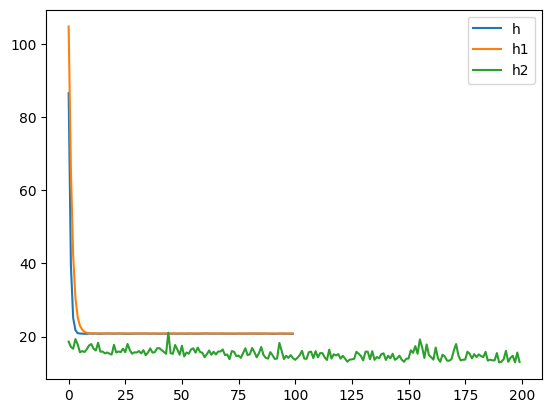

In [69]:
plt.plot(h.history['loss'], label = 'h')  # 단층 퍼셉트론
plt.plot(h1.history['loss'], label = 'h1') # 특성 2개 적용
plt.plot(h2.history['loss'], label = 'h2') # 특성 56개 적용 (epochs=200)
plt.legend()
plt.show()